# INFO 6210   DATA MANAGEMENT AND DATABASE DESIGN  

## Jobs Database Algorithms

### This project which is a part of Jobs Database project is aimed to build, gather and model the data of jobs in an educational domain for teaching staff and faculty. The major objective is to help job seekers find jobs matching/suiting their profiles easily from a list of departments in that educational domain. The educational institute we are focusing on is Northeastern University, where we have developed a job recommendation system which returns a list of jobs suitable for the candidate based on the most demanding skills of the particular college.

### Job details are scraped from the university website and the jobs obtained are from colleges which are companies in this scenario

#### Below is the data captured by scraping from Northeastern University Jobs for faculty

In [33]:
#pandas - a software library in Python programming language for data manipulation and analysis
#requests - an HTTP library used in making simpler requests
#lxml - an easy to use library for processing xml and html
#Beautiful soup - a package for parsing html and xml documents, which is useful for scraping

import pandas as pd 
import requests 
import lxml.html as lh 
from requests import get
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as bs

#dataframe defined for storing jobs related data like title,college,location,etc for faculties 
df = pd.DataFrame(columns = ['Position Title','Requisition Number','Division/College','Interdisciplinary Division/College','Location','Full-time_Part-time','Grade','Posting Date','Responsibilities','Qualifications','Additional Information'])

#empty list defined to store the values for each job 
links_list=[] 
i_main=0

#loop given for collecting data from all the pages of the website, here number of pages is 19
for i in range(1,19): 
    
    #url defines the link which is to be scraped
    url = "https://neu.peopleadmin.com/postings/search?commit=Search&page="+str(i)+"&utf8=%E2%9C%93"
    
    response = get(url)
    
    #python's in built library HTML parser 
    html_soup = bs(response.text,'html.parser') 
    
    #stores a container with all the jobs data
    all_jobs = html_soup.select('#search_results')
    
    #stores the job title names
    all_jobnames = html_soup.select('.col-md-4 a')
    
    #loop for getting values for a particular job by accesing that webpage 
    for value in  all_jobnames:
        links_list.append( 'https://neu.peopleadmin.com'+value['href'])
       
 #loop for obtaining all details of a specific job
for linkval in links_list:
    response = get(linkval)
    
    #python's in built library HTML parser for scraping current webpage data
    html_soup1 = bs(response.text,'html.parser')
        
    page = requests.get(linkval)
    
    #Store the contents of the website under document
    doc = lh.fromstring(page.content)
    td_elements = doc.xpath('//td')
    
    #placing the scraped values in a dataframe
    df.at[i_main,'Position Title'] = td_elements[0].text_content() 
    df.at[i_main,'Requisition Number'] = td_elements[1].text_content()
    df.at[i_main,'Division/College'] = td_elements[2].text_content()
    df.at[i_main,'Interdisciplinary Division/College'] = td_elements[3].text_content()
    df.at[i_main,'Location'] = td_elements[4].text_content()
    df.at[i_main,'Full-time/Part-time'] = td_elements[5].text_content()
    df.at[i_main,'Grade'] = td_elements[6].text_content()
    df.at[i_main,'Posting Date'] = td_elements[7].text_content()
    df.at[i_main,'Responsibilities'] = td_elements[8].text_content()
    df.at[i_main,'Qualifications'] = td_elements[9].text_content()
    df.at[i_main,'Additional Information'] = td_elements[10].text_content()
        
    i_main = i_main+1
 



In [34]:
#dataframe head gives the number of rows defines in the paramater

df.head(1000)

,Position Title,Requisition Number,Division/College,Interdisciplinary Division/College,Location,Full-time_Part-time,Grade,Posting Date,Responsibilities,Qualifications,Additional Information,Full-time/Part-time
0,ADA Program Manager,STFR004848,Human Resources Management,Not Applicable,Boston Main Campus,NaN,12,04/26/2019,Responsible for assuring the University’s comp...,•\tBachelor’s degree from an accredited colleg...,Criminal Background Check is required for this...,Full Time
1,Sr Associate Director for Advising & Programming,STFR005454,Global Experience Office,Not Applicable,Boston Main Campus,NaN,14,04/26/2019,Global Experience Office Overview:\nThe Global...,•\tMaster’s degree in a relevant field. \n•\tA...,,Full Time
2,Assoc Dir-HR Ops & Cust Serv,STFR005446,Human Resources Management,Not Applicable,Boston Main Campus,NaN,14,04/23/2019,The Associate Director for HR Operations & Cus...,Education:\n•\tBachelor’s degree in related fi...,This position will require a criminal backgrou...,Full Time
3,Academic Advisor,STFR005248,College of Engineering,,Boston Main Campus,NaN,10,04/25/2019,The Graduate School of Engineering (GSE) is se...,Master’s degree required. At least one to two ...,,Full Time
4,Senior Grant Administrator,STFR005453,College of Engineering,,Boston Main Campus,NaN,11,04/25/2019,The College of Engineering is seeking a motiva...,Bachelor’s degree or equivalent in accounting ...,,Full Time
5,Associate Computational Scientist,STFR005447,Information Technology Services,Not Applicable,Boston Main Campus,NaN,12,04/23/2019,The Research Computing (RC) team at Northeaste...,Requirements\n\n\tPhD in science or engineerin...,A criminal background check is required for th...,Full Time
6,Part-Time Lecturer,PTFR000292,College of Social Sciences and Humanities,,Boston Main Campus,NaN,No,10/27/2015,All qualified applications will be kept on fil...,"A Master’s Degree in Criminal Justice, Crimino...",,Part Time
7,Senior Systems Analyst,STFR005452,Information Technology Services,,Boston Main Campus,NaN,12,04/25/2019,Northeastern University seeks Senior Systems A...,"Position requires a Bachelor’s degree, or fore...",,Full Time
8,Executive Senior Associate AD-External Affairs,STFR005451,Athletics,,Boston Main Campus,NaN,14,04/25/2019,The Executive Senior Associate Athletics Direc...,"A bachelor’s degree is required, Master’s degr...",,Full Time
9,Assistant Teaching Professor – Commerce and Ec...,FTFR001258,College of Professional Studies,College of Professional Studies,Boston Main Campus,NaN,Yes,Non Tenure Track,04/24/2019,Northeastern CPS is seeking candidates for the...,• Terminal degree required in either economics...,Full Time


In [ ]:
#Converting the dataframe to a csv file

df.to_csv('./Project_ScrapeJobs.csv')

In [ ]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

#Providing the URL from which web scraping will be done
my_url = 'https://neu.peopleadmin.com/postings/search?commit=Search&page=1&utf8=%E2%9C%93'

#Opening up connection and grabbing the page
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

#For parsing
page_soup = soup(page_html, "html.parser")


#Seting the variable by finding the required class
scroll = page_soup.findAll("div",{"class":"select-wrapper"})

#Opening the file and then writing it
filename = "abc.csv"
f = open(filename, "w+")

#Headers for the column names of the CSV file
headers = "College,Position Type, Inter College, Location \n"
f.write(headers)

#Getting the College   
    
College = (scroll[1].text).replace(","," ")
print(College)

#Getting the Position Type   
    
Ptype = (scroll[1].text).replace(","," ")
print(Ptype)

#Getting the Interdisciplinary College   
    
InterCollege = (scroll[2].text).replace(","," ")
print(InterCollege)

#Getting the Full time/Part Time   
    
Full_PartTime = (scroll[3].text).replace(","," ")
print(Full_PartTime)

#Getting the Department   
    
Department = (scroll[4].text).replace(","," ")
print(Department)

#Getting the Grade   
    
Grade = (scroll[5].text).replace(","," ")
print(Grade)

#Getting the Tenure   
    
Tenure = (scroll[6].text).replace(","," ")
print(Tenure)

#Getting the location   
    
Location = (scroll[7].text).replace(","," ")
print(Location)

f.write(Location + "\n")
    
f.close()

# Scraping data of colleges of Northeastern University from Twitter API 

In [1]:
import twitter # pip install twitter

# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'BjmUCJhdzoDjVwLD8bEpSPVup'
CONSUMER_SECRET = 'uHTcKfjo10ICxcCxymRsnpBlOTkLBEH9SKuqJ9HMrt2VVQR7xu'
OAUTH_TOKEN = '1088826133171310592-fLr7HjDFvVoEF1WDLAhycHqESXSMgW'
OAUTH_TOKEN_SECRET = 'O71YWzK3qfY5papKg4xjmkerZL8nhjyZV90K9RydGRWYm'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

In [19]:
#tweepy - enables python to interact with twitter platform and use its API
#sys - system specific parameter and functions

import tweepy
import sys

CONSUMER_KEY = 'BjmUCJhdzoDjVwLD8bEpSPVup'
CONSUMER_SECRET = 'uHTcKfjo10ICxcCxymRsnpBlOTkLBEH9SKuqJ9HMrt2VVQR7xu'
ACCESS_TOKEN = '1088826133171310592-fLr7HjDFvVoEF1WDLAhycHqESXSMgW'
ACCESS_TOKEN_SECRET = 'O71YWzK3qfY5papKg4xjmkerZL8nhjyZV90K9RydGRWYm'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)


### Twitter User Data of Colleges

In [11]:
import json
import csv

#csv file with twitter data for all Northeastern colleges
filename = "CollegeTwitter.csv"
f = open(filename, "w",encoding="utf-8")

headers = "Name,ScreenName,Location,Followers,Description,Friends,List,Favourites,Verified,StatusCount\n"

f.write(headers)

#twitter handles of all the colleges of Northeastern University
username = ["@NUAdmissions","@GoNUathletics","@NUBouve","@NUCityAffairs","@NU_CAMD","@KhouryCollege","@NortheasternCOE","@NortheasternCPS",
             "@NortheasternCOS","@NUCSSH","@NU_Business","@NRHHatNU","@NortheasternITS","@NortheasternGEO","@ClubSnell",
              "@northeasternpd","@ResearchAtNU","@NU_HRL","@NUSL","@NortheasternSGA","@NUStudentLife","@NU_ADVANCE","@Northeastern",
               "@NU_UHCS"]

#looping for all the college names
for user in username:
    
    #with help of api user details of a user like followers,followees,friends,etc will be retrieved
    query = api.get_user(screen_name = user)
    Name = (query.name)
    print(Name)
    
    Screen_name = (query.screen_name)
    print(query.screen_name)
    
    Location = (query.location)
    print(query.location)
    
    Followers = str(query.followers_count)
    print(query.followers_count)
    
    Description = (query.description).replace(",", " ")
    Description1 = Description.replace("USA","usa")
    Description2 = Description1.replace("-", " ")
    print(Description2)
    
    Friends = str(query.friends_count)
    print(query.friends_count)
    
    List = str(query.listed_count)
    print(query.listed_count)
    
    Favorites = str(query.favourites_count)
    print(query.favourites_count)
    
    Verified = str(query.verified)
    print(query.verified)
    
    Statuses = str(query.statuses_count)
    print(query.statuses_count)
    
    #writing all the data obtained from twitter into a file
    print("--------------------------------------------------------------------------------------------")
    f.write(Name +","+ Screen_name +","+ Location.replace(",", "")+","+ Followers+","+ Description2.replace("\n", "") +","+ Friends +","+ List +","+ Favorites+ "," +Verified+","+Statuses+","+"\n")

f.close()


NUAdmissions
NUAdmissions
Boston, MA
4757
A glimpse into the @Northeastern undergraduate experience. Tweets managed by the Office of Undergraduate Admissions.
319
128
2955
False
6691
--------------------------------------------------------------------------------------------
Northeastern Huskies
GoNUathletics
Boston, Mass.
14055
The official Twitter feed of Northeastern Athletics—a proud member of the CAA  Hockey East and the Eastern Association of Rowing Colleges. #HowlinHuskies
349
207
1509
True
17609
--------------------------------------------------------------------------------------------
Bouvé College of Health Sciences at Northeastern
NUBouve
Boston, MA
417
Bouvé inspires and creates the next generation of interprofessional healthcare leaders for the well being of our global community.
257
4
457
False
542
--------------------------------------------------------------------------------------------
NUCityAffairs
NUCityAffairs
Boston, MA 
550

546
8
386
False
938
-----------------

### Twitter posts data of Users

In [4]:
import json
import csv

filename = "Colleges_tweet.csv"
f = open(filename, "w",encoding="utf-8")
tweetCount = 20
csv.register_dialect('myDialect',delimiter = '|',quoting=csv.QUOTE_NONE,skipinitialspace=True)
writer = csv.writer(f, dialect='myDialect')

headers = "ScreenName,Tweets,DateOfTweets,\n"

f.write(headers)

username = ["@NUAdmissions","@GoNUathletics","@NUBouve","@NUCityAffairs","@NU_CAMD","@KhouryCollege","@NortheasternCOE","@NortheasternCPS",
             "@NortheasternCOS","@NUCSSH","@NU_Business","@NRHHatNU","@NortheasternITS","@NortheasternGEO","@ClubSnell",
              "@northeasternpd","@ResearchAtNU","@NU_HRL","@NUSL","@NortheasternSGA","@NUStudentLife","@NU_ADVANCE","@Northeastern",
               "@NU_UHCS"]

#looping for each user in college username
for user in username:
    
    query = api.get_user(screen_name = user)
    Name = (query.name)
    print(Name)
    Screen_name = (query.screen_name)
    print(query.screen_name)
    
    
    print("--------------------------------------------------------------------------------------------")
      
    results = api.user_timeline(id=user, count=tweetCount)

    # foreach through all tweets pulled
    for tweet in results:
        tweets = (tweet.text.replace(",", "|"))
        print(tweets)
        tweet_date = str(tweet.created_at)
        print(tweet_date)
        #writer.writerow()
        f.write(Screen_name +","+tweets.replace("\n","|")+","+tweet_date +"\n")
            
    
f.close()


NUAdmissions
NUAdmissions
--------------------------------------------------------------------------------------------
Were you admitted to the College of Arts| Media| and Design? Will you be in NYC next week? If so| you and your fami… https://t.co/uw5hoBmeo3
2019-04-05 21:13:11
@renae20191 @Northeastern Congratulations! 🎉 See you on campus. 🌲🏢🌳
2019-03-14 18:02:36
RT @renae20191: Proud to have been accepted into Northeastern University| Ya girl going to Boston @Northeastern #Husky
2019-03-14 17:58:28
RT @TheNUinProgram: Congratulations to all of the students newly accepted to the https://t.co/CRXWhzu10n Program! Get ready to break out of…
2019-03-14 16:52:48
@Madina07928268 Ouch! We're sorry to hear about your toe| but excited to welcome you to Northeastern!
2019-03-14 12:45:25
@madisonn4263 Welcome to the pack! #NUHusky #NUin2019
2019-03-14 02:39:43
@TheConnorBishop Congratulations and welcome!
2019-03-13 23:57:42
Welcome #NUHusky's https://t.co/MqOAf915al
2019-03-13 23:05:12
👀 Decis

NUCityAffairs
NUCityAffairs
--------------------------------------------------------------------------------------------
RT @FriendsofBLA: The Spring BLAst| the fundraiser for @BostonLatinAcad  is happening Thursday!  https://t.co/nbY1CMYmKr https://t.co/H17Ps…
2019-04-24 09:55:06
RT @NUCrossing: Our friends in the Center of Community Service are looking for co-ops. If you know students who would be good for the job|…
2019-04-11 09:52:32
@Nobooksnoball @CharlieBakerMA So proud to sponsor such a great program| No Books No Ball!  It is Championship Satu… https://t.co/CZcgXOp68w
2019-04-06 18:46:42
If you are interested in permitting Carter Playground please contact Paul McCaffrey| City of Boston Parks Departmen… https://t.co/tu7L7qemtT
2019-02-13 14:50:08
RT @NU_ACES: @MassPromise is honoring the legacy of Martin Luther King| Jr. by leading a #dayofservice on January 21st at three sites: Free…
2019-01-12 12:01:21
RT @NUCrossing: Next week| come by to check out the RISE session and to lea

Northeastern COE
NortheasternCOE
--------------------------------------------------------------------------------------------
#Repost northeasternsop (get_repost)
・・・
PharmD Student Danny Jooyoung Kim and Vidhan Bhaiya of @NortheasternCOE re… https://t.co/8URESSd0Ci
2019-04-23 18:11:39
Congratulations

#Repost flyingtigers355 (get_repost)
・・・
Congratulations to Cadet Evelyn Soon! Last Friday the Arm… https://t.co/OZSY4jv0Q5
2019-04-23 15:15:14
Bradley Priem| BS| Chemical Engineering| had two co-ops that gave him the ability to delve into a particular indust… https://t.co/6buDPt7vRk
2019-04-23 14:02:37
RT @TIMatNUGov: Recently @NortheasternCOE Prof. Jerry Hajjar was featured in the @WashingtonPost on how #AI could be the solution to the #N…
2019-04-18 19:11:59
RT @CEE_NEU: Graduating senior Maria Franko is the recipient of the 2019 Compass Award| which recognizes exemplary seniors who| during thei…
2019-04-18 18:53:30
Register now for the 2019 “I-PrACTISE East” Conference which will be 

Northeastern CSSH
NUCSSH
--------------------------------------------------------------------------------------------
RT @nu_sccj: We love an old-fashioned print newspaper| but we love it more when they feature @NU_SCCJ alumni! Dodi… https://t.co/aJiIUFHJnr
2019-04-25 13:01:38
RT @drshytierra: My article| “Producing race disparities: A study of drug arrests across place and race” has been p… https://t.co/EtDZ0UZcwO
2019-04-24 19:01:13
Assistant Professor of English @SariAltschuler was just awarded a fellowship at Wellesley's Newhouse Center for the… https://t.co/NN77WFAfH5
2019-04-24 17:50:04
RT @english_nu: NU slam poets made it to the CUPSI 2019 semifinals! Congratulations| Interrobang Poets!… https://t.co/Lv0zXjksXA
2019-04-24 13:01:16
RT @Northeastern: An aerial view of #Northeastern in Boston. #NUexperience https://t.co/HTZyT6cg0w
2019-04-23 20:00:50
What can cute #dogs teach us about #democracy? Some #NUCSSH students are designing voting systems using photogenic… https://t.co/tLy

Northeastern ITS
NortheasternITS
--------------------------------------------------------------------------------------------
Resolved: Emergency updates to wireless networks for San Jose and Seattle campuses have been completed. Software is… https://t.co/abBsIYLyXy
2019-04-24 13:30:28
Monitoring: Updates for Charlotte and Toronto campuses are complete. Network maintenance for remaining campuses wil… https://t.co/mSCQsped5L
2019-04-24 03:41:11
In Progress: Scheduled maintenance is currently in progress. We will provide updates as necessary. https://t.co/B7SnY1Y5cG
2019-04-24 02:00:44
Scheduled (Apr 23| 2019| 22:00 EDT): Maintenance will begin as scheduled in 60 minutes. https://t.co/FHMSKM1Rvh
2019-04-24 00:59:47
Identified: The partial outage continues. Steps are being taken to resolve the issue completely with an emergency u… https://t.co/XNmC398cr8
2019-04-23 19:37:31
Scheduled (Apr 23| 2019| 22:00 EDT): Due to unexpected software issues| Information Technology Services will be con…

NU Police Department
northeasternpd
--------------------------------------------------------------------------------------------
We had a great turn out for our #CoffeeAndTeaWithNUPD. Shout out to Sgt.Burdulis from @TuftsPolice who partnered wi… https://t.co/q248LQ5cMx
2019-04-25 17:29:33
A follower pointed out our typo. A strong “contingent” Not continent! 😄 oops.
2019-04-22 18:24:22
A strong continent of NUPD Bike Officers served last week at the 123rd Annual BAA Boston Marathon. Riding w/ the Co… https://t.co/W7nQnjS61E
2019-04-22 16:15:03
Ofc. Sean McCarthy (c) &amp; his daughter| wife| &amp; son (l to r) ran the “Ryan Shaw Memorial Run” yest w/ @KD_Pikes’ Pat… https://t.co/aF0DiKxDMT
2019-04-21 18:58:54
We celebrate &amp; thank those telecommunications personnel| esp those at NUPD| for the job they do every day. They’re… https://t.co/uefsLoDEZs
2019-04-19 19:01:36
We so value the relationship we have with the hundreds of Northeastern Facilities employees. It was our pleasure ye… h

NortheasternLaw
NUSL
--------------------------------------------------------------------------------------------
Professor @MarthaFDavis is vice chair of the Mass. State Advisory Committee conducting a public hearing on labor tr… https://t.co/dhG3SW9oZd
2019-04-26 06:33:53
RT @NUexperts: Prescription drug monitoring programs have exploded in the U.S. @NUSL's @LeoBeletsky weighs in @theappeal. #OpioidEpidemic #…
2019-04-25 21:05:42
RT @MassBar: The Massachusetts Bar Association will present @NUSL student Anna Shaddae Rodriguez with its 2019 Oliver Wendell Holmes Jr. Sc…
2019-04-25 21:05:30
RT @NUSLclic: #About Face: The Changing Landscape of Facial Recognition 
@NUSL Friday| May 10| 2019. 
Keynote: @cFarivar 
Moderators: @hart…
2019-04-25 21:05:24
Hotel deadline! Today is the last day to avail of our reduced rate at the Colonnade Hotel for #WIL2019 from May 16-… https://t.co/j8HmOjcrpf
2019-04-25 11:05:12
RT @NUSLclic: Join panel moderators Woodrow @Hartzog &amp; @EvanSelinger as they 

Northeastern ADVANCE
NU_ADVANCE
--------------------------------------------------------------------------------------------
Still plenty of time left to donate to #WOCIA2020's #NUGivingDay challenge!  https://t.co/wMn9YzAabn
2019-04-11 20:40:08
Thanks to everyone who's already donated towards #WOCIA2020 in the #NUGivingDay challenge!  Now that we have unlock… https://t.co/YKlLFH0T6c
2019-04-11 16:30:47
We did it! Thanks to the generous support of 25 individual contributors| we unlocked the challenge funds for Women… https://t.co/2NOmk7ml8k
2019-04-11 14:45:00
We're nearly there!! Just 2 more contributors and we will unlock the funds. https://t.co/og7qNlq5Dv
2019-04-11 14:00:45
We have a chance to unlock $5|000 towards next year's Women of Color in the Academy conference through a… https://t.co/zmkjocnE46
2019-04-11 13:30:32
RT @StarzanPlanets: Nearly half of US female scientists leave full-time science after first child. And those who stay have their research p…
2019-02-20 20:32:14
RT

In [15]:
#reading the csv file into a dataframe

import pandas as pd
df1 = pd.read_csv('CollegeTwitter.csv',encoding='utf-8')
df1.head(200)

,Name,ScreenName,Location,Followers,Description,Friends,List,Favourites,Verified,StatusCount
0,NUAdmissions,NUAdmissions,Boston MA,4757,A glimpse into the @Northeastern undergraduate...,319,128,2955,False,6691
1,Northeastern Huskies,GoNUathletics,Boston Mass.,14055,The official Twitter feed of Northeastern Athl...,349,207,1509,True,17609
2,Bouvé College of Health Sciences at Northeastern,NUBouve,Boston MA,417,Bouvé inspires and creates the next generation...,257,4,457,False,542
3,NUCityAffairs,NUCityAffairs,Boston MA,550,NaN,546,8,386,False,938
4,NortheasternCAMD,NU_CAMD,Boston,2204,The latest updates events and stories from N...,865,92,6247,False,6976
5,Northeastern University Khoury College,KhouryCollege,Boston | Seattle | Charlotte | San Francisco B...,1878,The official Twitter account for @Northeastern...,512,49,1371,False,1974
6,Northeastern COE,NortheasternCOE,Boston MA,1584,@Northeastern University's College of Engineer...,308,50,1164,False,2989
7,Northeastern CPS,NortheasternCPS,Boston online and world wide,3916,Northeastern University's College of Professio...,614,103,2587,False,4221
8,Northeastern COS,NortheasternCOS,Boston Mass.,1569,Integrating intellectual discovery use inspir...,237,45,1676,False,3954
9,Northeastern CSSH,NUCSSH,Boston MA,1976,Northeastern University's College of Social Sc...,441,47,2417,False,5268


## Twitter data based on the search of Screen Name of users

In [20]:
#Dataframe for twitter tweets and data based on the colleges

posts =[] #user tweet on the college
favourites =[] #favourites count on the post
retweets = []  #number of retweets on the post
time = [] #time the post was posted
user_id = [] #user id of the user who posted
name = [] #name of the user who posted the post
followers = [] #number of followers
Colleges = [] #name of the movie for which post is posted
screen_name = [] #twitter handle name of the user who posted

college_names=df1['ScreenName'].tolist()
top = college_names[:100]
for college in top:
    fetched_tweets = api.search(college)
    for tweet in fetched_tweets:
        posts.append(tweet.text)
        favourites.append(tweet.favorite_count)
        retweets.append(tweet.retweet_count)
        time.append(tweet.created_at)
        user_id.append(tweet.id_str)
        followers.append(tweet.user.followers_count)
        screen_name.append(tweet.user.screen_name)
        name.append(tweet.user.name)
        Colleges.append(college)

In [21]:
#dataframe for college data based on user searches

import pandas as pd
twitter_data = pd.DataFrame(data = name, columns = ['UserName'])
twitter_data['College'] = Colleges
###twitter_data['Userid'] = user_id
twitter_data['TweetFollowers'] = followers
twitter_data['Tweet'] = posts
twitter_data['TweetTime'] = time
twitter_data['Retweets'] = retweets
twitter_data['ScreenName'] = screen_name
twitter_data

,UserName,College,TweetFollowers,Tweet,TweetTime,Retweets,ScreenName
0,Northeastern Huskies,GoNUathletics,14058,RT @GoNUwrowing: Spend your Saturday morning w...,2019-04-26 18:00:12,1,GoNUathletics
1,Northeastern Huskies,GoNUathletics,14058,RT @GoNUbaseball: GAME DAY | Rebecca Black sai...,2019-04-26 16:58:53,1,GoNUathletics
2,Northeastern Huskies,GoNUathletics,14058,RT @GoNUtrack: The #HowlinHuskies wrap up the ...,2019-04-26 16:28:05,1,GoNUathletics
3,Northeastern Alumni,GoNUathletics,5114,RT @GoNUathletics: Welcome to the first episod...,2019-04-26 16:12:20,14,AlumniNU
4,Nick Genco,GoNUathletics,219,"RT @brenttmay1: Nice bit, but how about a shou...",2019-04-26 15:04:16,1,nickgenco14
5,KG1,GoNUathletics,8,@GoNUathletics @AshleeFeldman Women’s Basketba...,2019-04-26 13:55:35,0,KG108525508
6,mollSOhard,GoNUathletics,309,RT @AlumniNU: Join us for the 16th annual @GoN...,2019-04-26 12:44:00,1,mcole5386
7,Brent May,GoNUathletics,65,"Nice bit, but how about a shout out to @GoNUwb...",2019-04-26 12:17:44,1,brenttmay1
8,Tim Duncan,GoNUathletics,2841,GETTING IT DONE! #HowlinHuskies https://t.co/w...,2019-04-26 02:11:18,0,TimDuncanAD
9,Northeastern Alumni,GoNUathletics,5114,Join us for the 16th annual @GoNUathletics Gol...,2019-04-25 22:45:00,1,AlumniNU


In [23]:
#converting dataframe to csv file

twitter_data.to_csv('./CollegeTwitterSearch.csv')

# Scraping Instagram User data from Instagram API

In [ ]:
#instaloader - tool to download pictures and captions from instagram

from itertools import islice
from datetime import datetime
from itertools import dropwhile, takewhile
from math import ceil
import instaloader
import pandas as pd
from instaloader import Instaloader, Profile
#the library used to extract data from instagram social media application
L = instaloader.Instaloader()#

#Creation of file to store the extracted data from API
filename = "Project_InstagramUser.csv"

#opening file in write mode to write data extracted by API
f = open(filename, "w",encoding="utf-8")

headers = "UserName,UserID,Followers,Biography,Followees,FullName\n"

f.write(headers)

#instagram handles of colleges
colleges = ['nuadmissions','gonuathletics','nubouve','nucityaffairs','khourycollege','nucoe','northeasterncos','nu_business_club','neuwomeninfinance','northeasternhro','northeasterngeo','clubsnell','northeasternpd','nu_hrl','nu_slearning','northeasternsga','nucareeradvance','nu_uhcs','northeastern'] 

#looping on the list of colleges and obtaining data like username,userid,etc
for college in colleges:
    profile = instaloader.Profile.from_username(L.context, college)
    username = profile.username
    print (username)
    
    userid = str(profile.userid)
    print (userid)
    
    followers = str(profile.followers)
    print (followers)
    
    biography = profile.biography
    print (biography)
    
    followees = str(profile.followees)
    print (followees)
    
    full_name = (profile.full_name)
    print (full_name)
    
    #writing data in file 
    
    f.write(username +","+ userid +","+followers+","+ biography.replace(","," ")+","+ followees+","+full_name+"\n")
    
    
    
    print ("------------------------------------------------------------------------------------------------------------")


f.close()

# Scraping Instagram posts using Instagram API

In [ ]:
from itertools import islice
from datetime import datetime
from itertools import dropwhile, takewhile
from math import ceil
import instaloader
import pandas as pd
from instaloader import Instaloader, Profile

L = instaloader.Instaloader()#
filename = "Project_InstagramPosts.csv"
f = open(filename, "w+",encoding="UTF-8")

#df = pd.DataFrame(columns = ['UserName','Timestamp','Likes','Comments','Caption'])

headers = "Name,Date,Likes,Comments,Captions\n"

f.write(headers)


colleges = ['nuadmissions','gonuathletics','nubouve','nucityaffairs','khourycollege','nucoe','northeasterncos','nu_business_club','neuwomeninfinance','northeasternhro','northeasterngeo','clubsnell','northeasternpd','nu_hrl','nu_slearning','northeasternsga','nucareeradvance','nu_uhcs','northeastern']





for college in colleges:
    profile = instaloader.Profile.from_username(L.context, college)
    
    username = profile.username
    print (username)
    print("----------------------------------")
    posts = profile.get_posts()

    SINCE = datetime(2019, 4, 1)
    UNTIL = datetime(2019, 1, 1)

    for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
        Date = (str(post.date).replace(","," ")) 
        print(post.date)
        print("----------------------------------")
        likes = (str(post.likes).replace(","," "))
        print(likes)
        print("----------------------------------")
        comments = (str(post.comments).replace(","," "))
        print(comments)
        print("----------------------------------")
        ###abc = L.download_post(post,target=profile.username)
        ###print(abc)
        Caption = (str(post.caption).replace(","," "))
        print (Caption)
        
        f.write(username +","+ Date +","+likes+","+comments+","+Caption+"\n")
        print ("------------------------------------------------------------------------------------------------------------")


f.close()
       

# Switch Case example

In [29]:
import pyodbc
import pandas as pd

In [30]:
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                     'Server=DESKTOP-4TA4DJ5;'
                     'Database=Project;'
                     'Trusted_Connection=yes;')
cursor=conn.cursor()
cursor.execute('exec JobsBySkill MBA;')

for row in cursor:
    print(row)

('Senior Program Director', 'STFR000835', 'College of Engineering', 'This is a highly visible position that will interact with university faculty, administrators, staff, students, healthcare industry partners, and healthcare systems management and staff.\r\nâ€¢\tMasters degree required (MBA preferred); an additional Master of Health Administration (MHA) highly desired.  Requires 10 â€“ 15 years of prior relevant experience, in the following areas:\r\nâ€¢\tadvanced project, program and portfolio management experience.\r\nâ€¢\thealth industry experience and knowledge.\r\nâ€¢\tstaff recruiting, management, coaching and performance management experience\r\nâ€¢\tMust be able to manage multiple assignments/projects simultaneously with ease and efficiency, and produce quality results in a fast paced environment\r\nâ€¢\tThink and work independently and analytically on assigned projects to meet milestones and action items in a timely manner\r\nâ€¢\tEffective time management, highly organized, a

In [31]:
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                     'Server=DESKTOP-4TA4DJ5;'
                     'Database=Project;'
                     'Trusted_Connection=yes;')
cursor=conn.cursor()
        #res ="Result of Query" 
        

def zero():
    print ("You typed zero.\n")
    cursor.execute('exec GetJobByTitle Professor;')
    for row1 in cursor:
         print(row1)
        
def sqr():
    print ("n is a perfect square\n")

def even():
    print ("n is an even number\n")

def prime():
    print ("n is a prime number\n")

# map the inputs to the function blocks
options = {0 : zero,
           1 : sqr,
           4 : sqr,
           9 : sqr,
           2 : even,
           3 : prime,
           5 : prime,
           7 : prime,
}

In [32]:
options[0]()

You typed zero.

('Lecturer/Assistant/Associate/Full Teaching Professor-Boston', 'FTFR000097', 'Khoury College of Computer Sciences', 'Boston Main Campus')
('Professor of the Practice', 'FTFR000616', 'Khoury College of Computer Sciences', 'Boston Main Campus')
('Asst/Assoc/Clinical Professor', 'FTFR000651', 'Khoury College of Computer Sciences', 'Boston Main Campus')
('Assistant Teaching Professor - Electrical Engineering Technology/Computer Engineering Technology', 'FTFR000680', 'College of Professional Studies', 'Boston Main Campus')
('Assistant/Associate/Full Professor - Health', 'FTFR000810', 'School of Law', 'Boston Main Campus')
('Lecturer/Asst/Assoc/Full Teaching Professor-ALIGN MS in CS', 'FTFR000815', 'Khoury College of Computer Sciences', 'Boston Main Campus')
('Lecturer/Assistant/Associate/Full Teaching Professor â€“ Professional Masterâ€™s programs including ', 'FTFR000816', 'Khoury College of Computer Sciences', 'Seattle Campus')
('Lecturer/Assistant/Associate/Full Teachin

# Word cloud based on jobs 

In [35]:
import numpy as np
#Importing the pandas library for extracting the data from CSV and stored in dataframe
import pandas as pd
#The OS module in Python provides a way of using operating system dependent functionality
from os import path
#importing PIL Python Imaging Library (abbreviated as PIL) (in newer versions known as Pillow)
#is a free library for the Python programming language that adds support for opening, manipulating, 
#and saving many different image file formats. 
from PIL import Image
#Word cloud object for generating and drawing.
#Color generator based on a color image.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
#importing data in dataframe through CSV file


df = pd.read_csv('Project_ScrapeJobs1.csv',encoding='utf-8')
df.head(200)

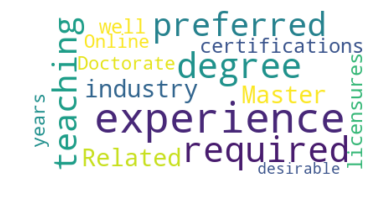

In [38]:
#datafram column on which the word cloud is generated, the data from that column is stored text string
text = df.Qualifications[500]

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

#generate() method is used to generate the words to be added in word cloud
wordcloud = WordCloud(max_font_size=50, max_words=700, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Citations

### Learnt and gathered knowledge from the below sources:
https://developer.twitter.com/en/docs.html

http://socialmedia-class.org/twittertutorial.html

https://www.programiz.com/python-programming/anonymous-function

https://github.com/nikbearbrown/INFO_6210/

https://www.datacamp.com/community/tutorials/wordcloud-python

https://pypi.org/project/instaloader/

https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059


# Contributions

Suhas Balanagar, 001356872 - Performed scraping of the websites with the help of html tags and stored it in the database. Then using this data, performed sql queries by creating tables, inserting the data, creating views, functions and stored procedures. Then connecting the database to the python notebook and creating switch cases. Then writing an in-detail report of the project explaining all the functionalities.

Ankita Brahmankar, 001389907 - Performed scraping of the Twitter data with the help of API stored it in the database. Then using this data, performed sql queries by creating tables, inserting the data, creating views, functions and stored procedures. Then connecting the database to the python notebook and creating switch cases. Then writing an in-detail report of the project explaining all the functionalities.

Ankita Moharir, 001356837 - Performed scraping of the Instagram data with the help of API and stored it in the database. Then using this data, performed sql queries by creating tables, inserting the data, creating views, functions and stored procedures. Then connecting the database to the python notebook and creating switch cases. Then writing an in-detail report of the project explaining all the functionalities.

# 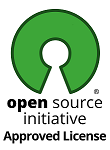